# The Data Science Pipeline: Exploring Video Game Ratings From IGN Over the Past 10 Years

## 1. Introduction

### Hello and welcome! 
This is a walkthough of the Data Science Pipeline, using Python as the language of choice. Before we begin, let's first talk about our dependencies:
>This tutorial was created on a system running macOS. 

>Depending on your operating system, you may already have version of Python installed.

>However, any operating system should work. For more information, visit https://www.python.org/downloads/operating-systems/

### Jupyter & IPython
If you don't already know, this github page is actually a Jupyter (IPython) notebook that allows you to document both the input and output of code with boxes of text (known as "Markdown cells" - http://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html#).<br><br>
These cells support comment styling augmented with a lightweight and easy-to-use markup langugae (https://daringfireball.net/projects/markdown/syntax).

Although not technically required, using an application that supports interactive literate programming makes the entire pipeline process far easier to document, understand, and benefit from; using one is highly recommended (especially for beginners and newcomers). 

> You may download Jupyter through Anaconda: http://jupyter.readthedocs.io/en/latest/install.html

### Python and IPython Versions
I am using Python version 3.6.2 and IPython version 6.1.0. You may verify your versions via
> Help ---> About

### Data
Once you have your environment set up, you can retrieve the data. For this walkthough we will use:
> IGN's game review data for the last 20 years (up to 2016), found here: https://www.kaggle.com/egrinstein/20-years-of-games/

> Video games with sales greater than 100,000 (from vgchartz.com), found here: https://www.kaggle.com/gregorut/videogamesales/

## 2. Getting Started - Looking at our data

We start by importing the necessary packages, reading the data in, and parsing it into a dataframe. Now is a good time to perform any other sanitization-related tasks before we begin to form perceptions and make assumptions about the data set. For example, we will search for missing entries (usually recorded as 'nan') and impute values (if necessary).

In [1]:
import pandas as pd
from pandas import pivot_table
import seaborn as sns
from datetime import datetime
import matplotlib.pyplot as plt


ign = pd.read_csv('/home/jovyan/notebooks/Final Project/dkanney.github.io/data/ign.csv')
vgsales = pd.read_csv('/home/jovyan/notebooks/Final Project/dkanney.github.io/data/vgsales.csv')


# Restrict to games made from 2006-2016 inclusive
ign = ign[ign['release_year'] > 2005]
# display('ign: ', ign[ign['title'] == 'Sonic the Hedgehog'], 'len: ', len(ign), 'vgsales: ', vgsales.head(10), 'len: ', len(df2))


# Join the two dataframes based on video game title/Name, getting rid of anything that we don't have release date.
raw_data = pd.merge(ign, vgsales, left_on='title', right_on='Name', how='inner')


# Using release year, release month, and release day columns to create a new column for release date as a datetime object
for i, row in raw_data.iterrows():
    raw_data.loc[i, 'release_date'] = pd.to_datetime(str(row['release_year']) + '-' + str(row['release_month']) + '-' + str(row['release_day']))

    
# Getting rid of unsued/duplicate columns
del raw_data['release_month']
del raw_data['release_year']
del raw_data['release_day']
del raw_data['Unnamed: 0']
del raw_data['genre']
del raw_data['Year']
del raw_data['Name']
del raw_data['url']


# Get a list of all columns that aren't numerical/quantitative/datetime, and strip them of whitespace
for col in list(set(raw_data.columns.ravel()) - set(raw_data.describe().columns.ravel()) - set(['release_date'])):
    raw_data[col] = raw_data[col].str.strip()


display('raw_data: ', raw_data.head(20), '# of rows: ', len(raw_data))
# display('raw_data: ', raw_data.ix[480:500], 'len: ', len(raw_data))

'raw_data: '

,score_phrase,title,platform,score,editors_choice,Rank,Platform,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales,release_date
0,Amazing,LittleBigPlanet PS Vita,PlayStation Vita,9.0,Y,1298,PSV,Platform,Sony Computer Entertainment,0.40,0.72,0.02,0.33,1.47,2012-09-12
1,Great,NHL 13,Xbox 360,8.5,N,3048,X360,Sports,Electronic Arts,0.51,0.11,0.00,0.05,0.67,2012-09-11
2,Great,NHL 13,Xbox 360,8.5,N,3097,PS3,Sports,Electronic Arts,0.33,0.22,0.00,0.10,0.65,2012-09-11
3,Great,NHL 13,PlayStation 3,8.5,N,3048,X360,Sports,Electronic Arts,0.51,0.11,0.00,0.05,0.67,2012-09-11
4,Great,NHL 13,PlayStation 3,8.5,N,3097,PS3,Sports,Electronic Arts,0.33,0.22,0.00,0.10,0.65,2012-09-11
5,Amazing,Guild Wars 2,PC,9.0,Y,693,PC,Action,NCSoft,0.95,1.06,0.00,0.29,2.30,2012-09-11
6,Good,Tekken Tag Tournament 2,PlayStation 3,7.5,N,2372,PS3,Fighting,Namco Bandai Games,0.28,0.33,0.13,0.14,0.88,2012-09-11
7,Good,Tekken Tag Tournament 2,PlayStation 3,7.5,N,5283,X360,Fighting,Namco Bandai Games,0.19,0.12,0.01,0.03,0.35,2012-09-11
8,Good,Tekken Tag Tournament 2,PlayStation 3,7.5,N,7980,WiiU,Fighting,Namco Bandai Games,0.09,0.07,0.01,0.01,0.19,2012-09-11
9,Good,Tekken Tag Tournament 2,Xbox 360,7.5,N,2372,PS3,Fighting,Namco Bandai Games,0.28,0.33,0.13,0.14,0.88,2012-09-11


'# of rows: '

13646

### Missing Data

Let's create a function in order to assist us with finding missing (nan) values in our dataframe:

In [2]:
# Check for NaNs in the dataframe, printing 'True' (or 'False') followed by the columns with 'nan'. 
# If the user specifies True for 'printrows', all entries containing 'nan' will be printed as well.
def check_for_nan(raw_data, printrows=False):
    print(raw_data.isnull().values.any())

    if (printrows):
        print(raw_data.isnull().sum())
        
        # Find rows containing NaNs
        nan_rows = raw_data[raw_data.isnull().T.any().T]

        for i, row in nan_rows.iterrows():
            display(row)

Running the next cell returns the remaining records with 'NaN' entries

In [3]:
check_for_nan(raw_data, printrows=True)

True
score_phrase      0
title             0
platform          0
score             0
editors_choice    0
Rank              0
Platform          0
Genre             0
Publisher         7
NA_Sales          0
EU_Sales          0
JP_Sales          0
Other_Sales       0
Global_Sales      0
release_date      0
dtype: int64


score_phrase                      Bad
title              Sonic the Hedgehog
platform                     Xbox 360
score                             4.8
editors_choice                      N
Rank                             4147
Platform                          PS3
Genre                        Platform
Publisher                         NaN
NA_Sales                            0
EU_Sales                         0.48
JP_Sales                            0
Other_Sales                         0
Global_Sales                     0.48
release_date      2006-11-30 00:00:00
Name: 2455, dtype: object

score_phrase                      Bad
title              Sonic the Hedgehog
platform                PlayStation 3
score                             4.2
editors_choice                      N
Rank                             4147
Platform                          PS3
Genre                        Platform
Publisher                         NaN
NA_Sales                            0
EU_Sales                         0.48
JP_Sales                            0
Other_Sales                         0
Global_Sales                     0.48
release_date      2007-02-07 00:00:00
Name: 2459, dtype: object

score_phrase                    Great
title                    Mario Tennis
platform                          Wii
score                             8.5
editors_choice                      Y
Rank                            15264
Platform                          3DS
Genre                          Sports
Publisher                         NaN
NA_Sales                            0
EU_Sales                            0
JP_Sales                         0.02
Other_Sales                         0
Global_Sales                     0.02
release_date      2010-06-30 00:00:00
Name: 9305, dtype: object

score_phrase                     Good
title                  World of Tanks
platform                           PC
score                             7.5
editors_choice                      N
Rank                            13964
Platform                         X360
Genre                         Shooter
Publisher                         NaN
NA_Sales                            0
EU_Sales                         0.03
JP_Sales                            0
Other_Sales                         0
Global_Sales                     0.04
release_date      2011-07-21 00:00:00
Name: 10880, dtype: object

score_phrase                    Great
title                  World of Tanks
platform                     Xbox 360
score                               8
editors_choice                      N
Rank                            13964
Platform                         X360
Genre                         Shooter
Publisher                         NaN
NA_Sales                            0
EU_Sales                         0.03
JP_Sales                            0
Other_Sales                         0
Global_Sales                     0.04
release_date      2014-03-26 00:00:00
Name: 10882, dtype: object

score_phrase                 Mediocre
title                    Stronghold 3
platform                           PC
score                             5.5
editors_choice                      N
Rank                             8505
Platform                           PC
Genre                        Strategy
Publisher                         NaN
NA_Sales                         0.06
EU_Sales                          0.1
JP_Sales                            0
Other_Sales                         0
Global_Sales                     0.16
release_date      2011-11-04 00:00:00
Name: 11247, dtype: object

score_phrase                              Amazing
title             Homeworld Remastered Collection
platform                                       PC
score                                           9
editors_choice                                  Y
Rank                                        16194
Platform                                       PC
Genre                                    Strategy
Publisher                                     NaN
NA_Sales                                        0
EU_Sales                                     0.01
JP_Sales                                        0
Other_Sales                                     0
Global_Sales                                 0.01
release_date                  2015-02-24 00:00:00
Name: 13201, dtype: object

We now see that many of these rows contain missing/'NaN' values under 'Publisher'.

## 3. Tidying our data

### Missing Publisher names?
Let's begin by looking up the missing Publishers and filling in the missing data points (see specific entries above). Since there doesn't seem to be a clear pattern or reason for why this data is missing, we will assume for now that it is Missing Completely at Random (MCAR). Read more about the three types of missing data at 
    
    https://en.wikipedia.org/wiki/Missing_data#Techniques_of_dealing_with_missing_data

Due to the small amount of missing Publisher names, we can use this moment to learn a bit more about our data set while imputing the missing data.

In [4]:
# Publisher --> 'Sega'
# (SOURCE: https://en.wikipedia.org/wiki/Sonic_the_Hedgehog_(2006_video_game))
raw_data.loc[2455, 'Publisher'] = 'Sega'
raw_data.loc[2459, 'Publisher'] = 'Sega'


# Publisher --> 'Nintendo'
# (SOURCE: https://en.wikipedia.org/wiki/Mario_Tennis)
raw_data.loc[9305, 'Publisher'] = 'Nintendo'


# Publisher --> 'Wargaming'
# (SOURCE: https://en.wikipedia.org/wiki/World_of_Tanks)
raw_data.loc[10880, 'Publisher'] = 'Wargaming' # Initial release
raw_data.loc[10882, 'Publisher'] = 'Wargaming' # Console edition


# Publisher --> '7Sixty'
# (SOURCE: https://en.wikipedia.org/wiki/Stronghold_3)
raw_data.loc[11247, 'Publisher'] = '7Sixty'


# Publisher --> 'Gearbox'
# (SOURCE: http://store.steampowered.com/app/244160/Homeworld_Remastered_Collection/)
raw_data.loc[13201, 'Publisher'] = 'Gearbox'


# There appears to be Publishers with similar strings (i.e. 'Valve' and 'Valve Software'). 
# We can group these together to simplify analysis.
for i in raw_data[raw_data['Publisher'] == 'Valve Software'].index:
    raw_data.loc[i, 'Publisher'] = 'Valve'

Running the next cell returns the remaining records with 'NaN' entries

In [5]:
check_for_nan(raw_data)

False


## 4. Exploratory Data Analysis - Plotting Our Data

Let's look at some visualizations of our data set. We can try several plots of differnt types in order to obtain a better understanding of our data set.

### <em>The Most Reviewed Genres (IGN)</em>

<h4>Pie chart</h4>

Action          4121
Sports          2452
Shooter         1476
Misc             984
Racing           894
Role-Playing     821
Platform         820
Fighting         532
Simulation       431
Adventure        413
Puzzle           364
Strategy         338
Name: Genre, dtype: int64

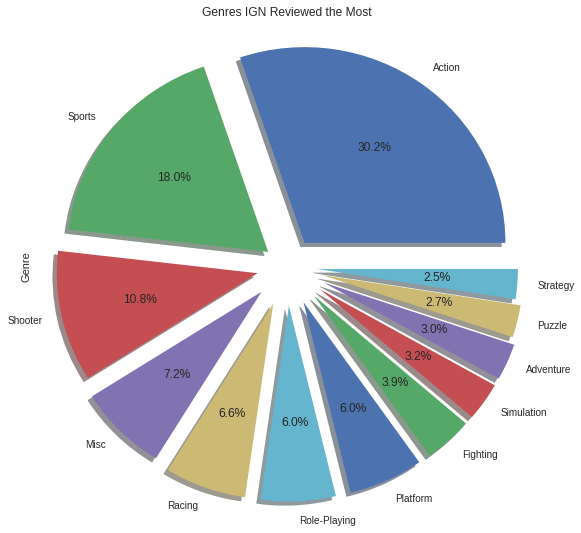

In [126]:
display(raw_data['Genre'].value_counts())

raw_data['Genre'].value_counts().plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0.15,0.12,0.15,0.18,0.2,0.2,0.2,0.2,0.2,0.2,0.18,0.15])
plt.title('Genres IGN Reviewed the Most')
fig = plt.gcf().set_size_inches(9,9)
plt.show()

<h4>Scatter plot</h4>

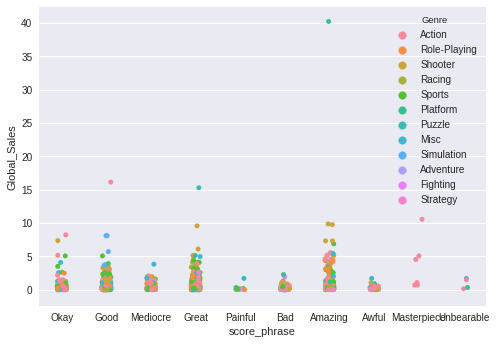

In [127]:
review_df = raw_data['Genre'].value_counts().reset_index()
review_df.columns = [['Genre','Reviews']]

sns.stripplot(x='score_phrase',y='Global_Sales',jitter=True,hue='Genre',data=raw_data.sample(int(.1 * len(raw_data))))
plt.show()

Although this scatter plot shows a trend, it's certainly not the <em>only</em> way we could vizualise this data. Let's try a horizontal bar plot. 

<h4>Bar plot</h4>

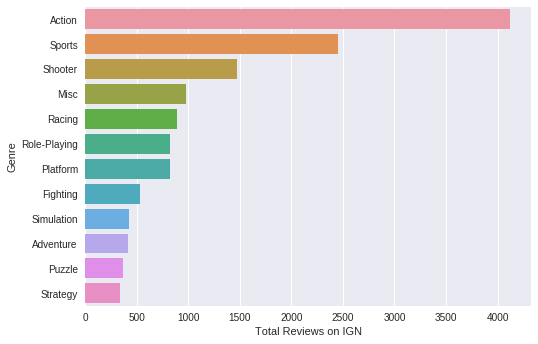

In [130]:
ax = sns.barplot(x='Reviews',y='Genre',data=review_df)
ax.set(xlabel='Total Reviews on IGN', ylabel='Genre')
plt.show()

This bar plot shows each genre's individual ranking much clearer.<br>
<strong>Based on these plots, the three most-reviewed genres (by IGN) appear to be Action, Sports, and Shooter.</strong><br>
Let's continue exploring this data by plotting other potentially important features, such as sales.<br><br>

### <em>The Genres with the Highest Sales in North America</em>

<h4>Pie chart</h4>

Genre
Action          877.83
Sports          683.35
Shooter         582.60
Platform        447.05
Misc            410.24
Racing          359.42
Role-Playing    327.28
Fighting        223.59
Simulation      183.31
Puzzle          123.78
Adventure       105.80
Strategy         68.70
Name: NA_Sales, dtype: float64

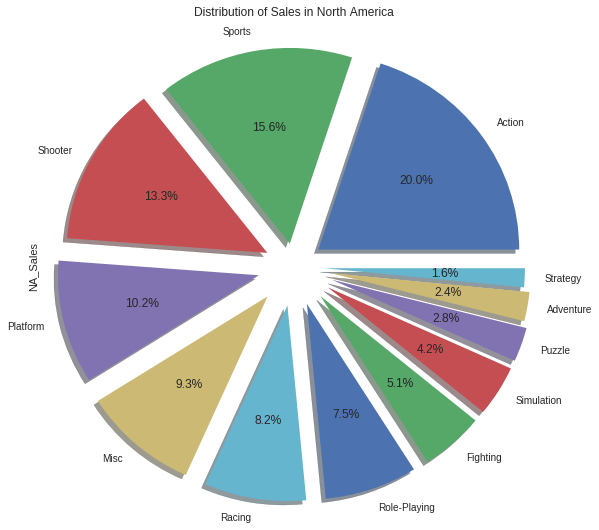

In [132]:
NA_Sales = vgsales.groupby('Genre').sum()['NA_Sales'].copy().sort_values()[::-1]
display(NA_Sales)

NA_Sales.plot(kind='pie',shadow=True,autopct='%1.1f%%',explode=[0.15,0.12,0.15,0.18,0.2,0.2,0.2,0.2,0.2,0.2,0.18,0.15])
plt.title('Distribution of Sales in North America')
fig = plt.gcf().set_size_inches(9,9)
plt.show()

<h4>Scatter plot</h4>

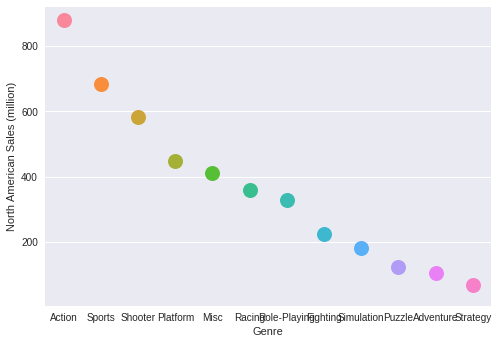

In [143]:
ax = sns.stripplot(x='Genre',y='NA_Sales',data=NA_Sales,size=15)
ax.set(xlabel='Genre', ylabel='North American Sales (million)')
plt.show()

<h4>Bar plot</h4>

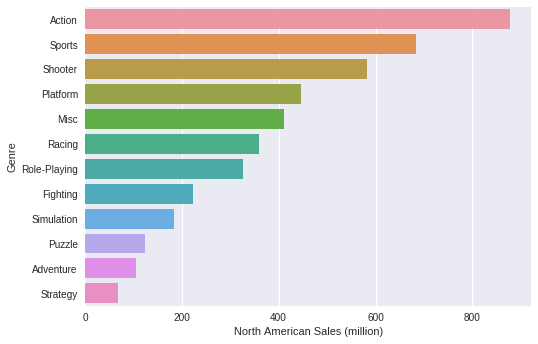

In [140]:
ax = sns.barplot(x='NA_Sales',y='Genre',data=NA_Sales)
ax.set(xlabel='North American Sales (million)', ylabel='Genre')
plt.show()

Let's take a look at how these genres performed globally.<br><br>

### <em>The Genres with the Highest Sales Worldwide</em>

<h4>Pie chart</h4>

Genre
Action          1751.18
Sports          1330.93
Shooter         1037.37
Role-Playing     927.37
Platform         831.37
Misc             809.96
Racing           732.04
Fighting         448.91
Simulation       392.20
Puzzle           244.95
Adventure        239.04
Strategy         175.12
Name: Global_Sales, dtype: float64

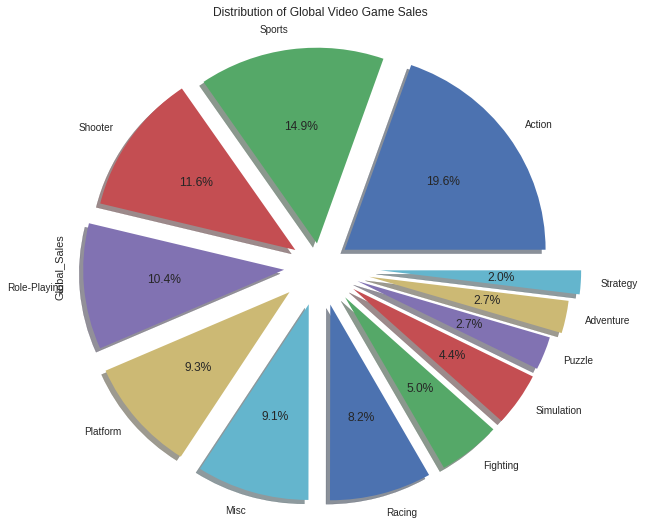

In [141]:
world_sales = vgsales.groupby('Genre').sum()['Global_Sales'].copy().sort_values()[::-1]
display(world_sales)

world_sales.plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0.15,0.12,0.15,0.18,0.2,0.2,0.2,0.2,0.2,0.2,0.25,0.3])
plt.title('Distribution of Global Video Game Sales')
fig = plt.gcf().set_size_inches(9,9)
plt.show()

<h4>Bar plot</h4>

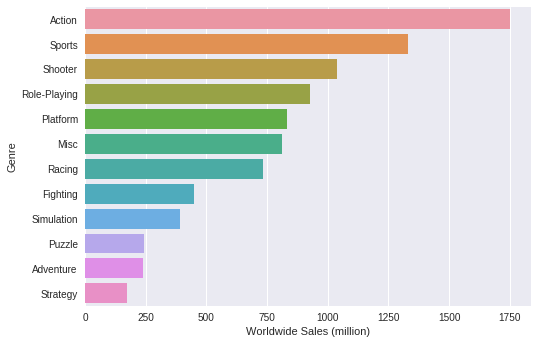

In [142]:
world_sales = world_sales.to_frame().reset_index()

ax = sns.barplot(x='Global_Sales',y='Genre',data=world_sales)
ax.set(xlabel='Worldwide Sales (million)', ylabel='Genre')
plt.show()

Interesting. Now let's take a look at how these genres performed on each Platform.<br><br>

### <em>Global Genre Sales by Platform</em>

<h4>Pie chart</h4>

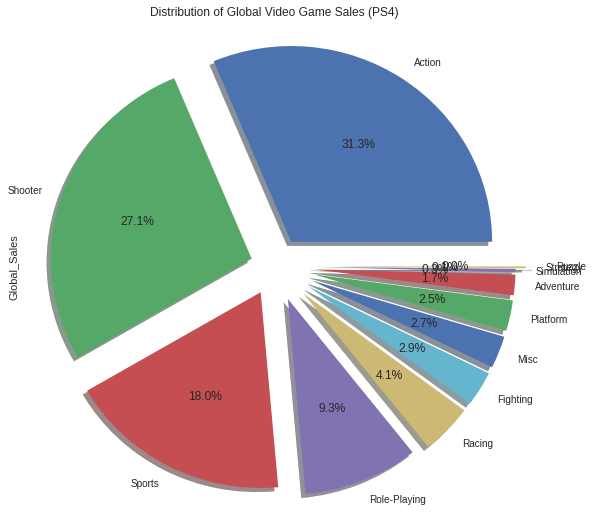

In [144]:
world_sales = vgsales[vgsales['Platform'] == 'PS4'].groupby('Genre').sum()['Global_Sales'].copy().sort_values()[::-1]

world_sales.plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0.15,0.12,0.15,0.18,0.2,0.2,0.2,0.2,0.2,0.2,0.25,0.3])
plt.title('Distribution of Global Video Game Sales (PS4)')
fig = plt.gcf().set_size_inches(9,9)
plt.show()

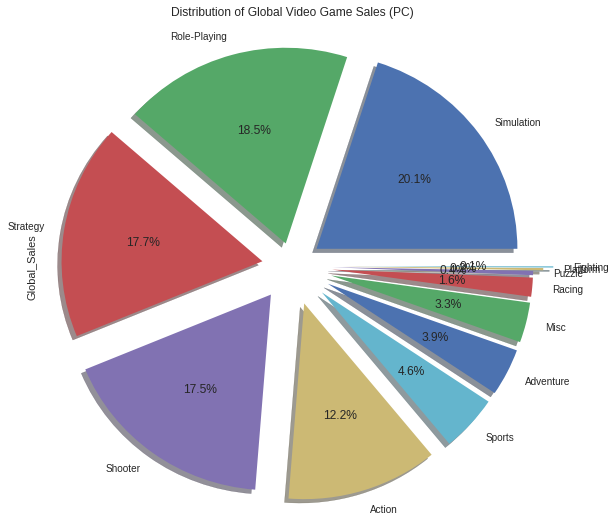

In [145]:
world_sales = vgsales[vgsales['Platform'] == 'PC'].groupby('Genre').sum()['Global_Sales'].copy().sort_values()[::-1]

world_sales.plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0.15,0.12,0.15,0.18,0.2,0.2,0.2,0.2,0.2,0.2,0.25,0.3])
plt.title('Distribution of Global Video Game Sales (PC)')
fig = plt.gcf().set_size_inches(9,9)
plt.show()

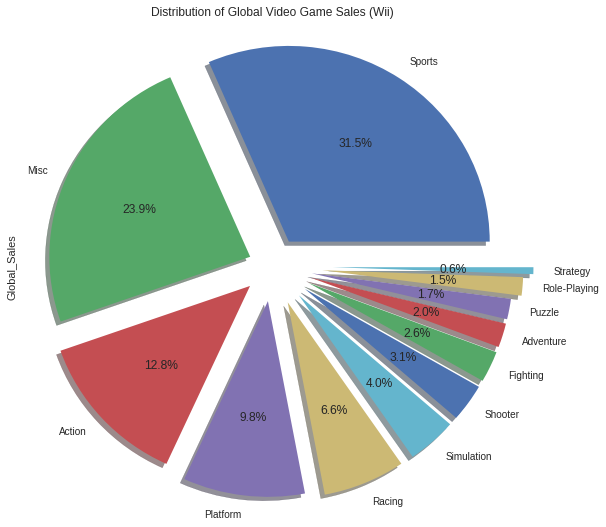

In [146]:
world_sales = vgsales[vgsales['Platform'] == 'Wii'].groupby('Genre').sum()['Global_Sales'].copy().sort_values()[::-1]

world_sales.plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0.15,0.12,0.15,0.18,0.2,0.2,0.2,0.2,0.2,0.2,0.25,0.3])
plt.title('Distribution of Global Video Game Sales (Wii)')
fig = plt.gcf().set_size_inches(9,9)
plt.show()

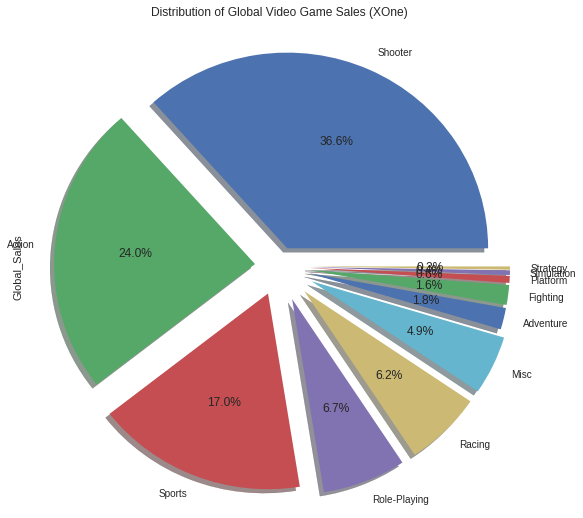

In [147]:
world_sales = vgsales[vgsales['Platform'] == 'XOne'].groupby('Genre').sum()['Global_Sales'].copy().sort_values()[::-1]
world_sales

world_sales.plot(kind='pie',autopct='%1.1f%%',shadow=True,explode=[0.1,0.12,0.15,0.18,0.18,0.18,0.15,0.15,0.15,0.15,0.15])
plt.title('Distribution of Global Video Game Sales (XOne)')
fig = plt.gcf().set_size_inches(9,9)
plt.show()

# vgsales.Platform.unique()

In addition to being the top 3 <strong>most reviewed</strong> game genres, Action, Sports, and Shooter games seem to <strong>sell more than</strong> the other genres as well.<br><br>
<strong>Is it possible that sales and scores are related? </strong> Or could they be independent of each other?<br>
What about the relationship between platforms and scores? Do certain platforms get better scores than others?

We want to start by plotting the relationship between global video game sales and review scores. <br>
> We can model this relationship with a line of best fit (obtained via <strong>linear regression</strong>
> http://www.statsmodels.org/stable/regression.html).

<h4>Global Video Game Sales-Score Relationship </h4>

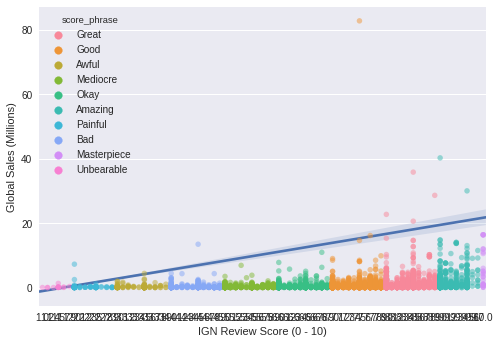

In [148]:
s = raw_data.sample(6000)

ax = sns.stripplot(x='score',y='Global_Sales',hue='score_phrase',data=s, alpha=.5, size=5.5)
sns.regplot(x='score',y='Global_Sales',data=s,scatter=False)
ax.set(xlabel='IGN Review Score (0 - 10)', ylabel='Global Sales (Millions)')

plt.show()

This plot ...


!!! START HERE. !!! 
    > Might not keep the next plot.

    > Move on to Part (5) - OLS; LR Analysis

    > Write about the results

    > Conculsion

<h4>Average Global Video Game Sales-Score Relationship </h4>

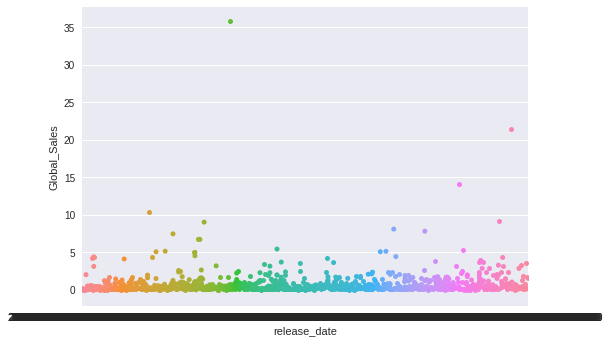

In [117]:
# s = s.groupby('Platform').mean()
s = raw_data.sample(1000)
sns.stripplot(x='release_date',y='Global_Sales',data=s)
plt.show()

## 5. Making Predictions

By calculating the statistics of a regression model, we may get a better understanding of the quality of the model's fit. Previously, our plotted regression model was simply just that -- the line of best fit. However, much more occurs "behind the scenes" that makes analysis and prediction much more nuanced than simply plugging in data points and getting a perfect fit every time. Thus, an important part of Data Science involves using the right regression techniques for your data set.

### OLS and Linear Regression Analysis

### Results of Testing our Hypothesis 

In [74]:
# score_df = raw_data[:50].copy().set_index(['score', 'score_phrase', 'Publisher'])

# sns.stripplot(x=raw_data.set_index(['Global_Sales']).sort_index()[::-1][:50]['editors_choice'],y='score',hue=raw_data.index,data=raw_data.set_index(['Global_Sales']).sort_index()[::-1][:50])
# plt.show()

# display(raw_data.set_index(['Global_Sales']).sort_index()[::-1].head(25))

## 6. Conclusion